<a href="https://colab.research.google.com/github/agustinsantos/CorrelatedQPQ/blob/main/Testing_QPQ_Copulas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [29]:
# set theme
plt.style.use('bmh')
sns.set_style('darkgrid')

# Introduction

The objective of this notebook is to carry out proofs of concept on the use of Copulas as a tool for the development of QPQ with correlated players. The intention is to make mathematical analyzes and simulations of various copulas and study their behavior in the development of QPQ algorithms. For this, copulas with simple mathematical definitions that can be treated analytically and later verified by simulation will be used.

Code and examples from:
* https://medium.com/@financialnoob/introduction-to-copulas-part-1-2ccbc5373d2e
    * https://github.com/financialnoob/misc/blob/9e811aa1192d1384485e07f88d8240154eb46c03/4.introduction_to_copulas_1.ipynb
* https://medium.com/@financialnoob/introduction-to-copulas-part-2-9de74010ed87
    * https://github.com/financialnoob/misc/blob/d9151d1128d84d8f3585b00ba41b73f5303499b7/5.introduction_to_copulas_2.ipynb
    
Material about Copula
* http://archiv.stochastik.uni-freiburg.de/homepages/schmidt/publications/TSchmidt_eqf_Copulas.pdf
* http://www.columbia.edu/~mh2078/QRM/Copulas.pdf
* https://www.uni-ulm.de/fileadmin/website_uni_ulm/mawi.inst.110/Seminar__Copulas_and_Applications_WS2021/David_Ziener_-_Notes__Archimedean_Copulas.pdf
* https://www.math.tugraz.at/~cela/Vorlesungen/RiskEnglisch/19_20/Lecture9_5_11_2019.pdf


# Concept of copulas
Copulas are a tool for modeling and capturing the dependence of two or more random variables. The main purpose of a copula is to disentangle the dependence structure of a random vector from its marginals. A d-dimensional copula is defined as a function $ C : [0, 1]^{d}  \rightarrow [0, 1] $ which is a cumulative distribution function (cdf) with uniform marginals.

Copula is just a joint CDF of multiple random variables with marginal distributions Uniform(0,1). Copula allows us to separate modeling of dependence structure from modeling marginal distributions (because we can use probability integral transform to transfrom uniform distribution to any distribution of our choice).

The copula of $(X_{1},X_{2},\dots ,X_{d})$ is defined as the joint cumulative distribution function of $(U_{1},U_{2},\dots ,U_{d})$:

$$ C(u_{1},u_{2},\dots ,u_{d})=\Pr[U_{1}\leq u_{1},U_{2}\leq u_{2},\dots ,U_{d}\leq u_{d}] $$,

where $U_i = F_i(X_i)$ is the marginal CDFs of $X_i$.

## Important Copulas
### Independence copula
First of all, the independence copula is given by:
$$\prod(\textbf{u}) = \prod_{i=1}^{d}u_i$$

### Archimedean family
Archimedean family is probably the most famous class of copulas. Archimedean copulas are an associative class of copulas. Most common Archimedean copulas admit an explicit formula, something not possible for instance for the Gaussian copula. In practice, Archimedean copulas are popular because they allow modeling dependence in arbitrarily high dimensions with only one parameter, governing the strength of dependence.

A copula C is called Archimedean if it admits the representation:
$${\displaystyle C(u_{1},\dots ,u_{d};\theta )=\psi ^{[-1]}\left(\psi (u_{1};\theta )+\cdots +\psi (u_{d};\theta );\theta \right)}$$

where $\psi \!:[0,1]\times \Theta \rightarrow [0,\infty )$ is a continuous, strictly decreasing and convex function such that $\psi (1;\theta )=0$,
 $\theta$ is a parameter within some parameter space $\Theta$, and $\psi$ is the so-called generator function and $\psi ^{[-1]}$ is its pseudo-inverse defined by

$${\displaystyle \psi ^{[-1]}(t;\theta )=\left\{{\begin{array}{ll}\psi ^{-1}(t;\theta )&{\mbox{if }}0\leq t\leq \psi (0;\theta )\\0&{\mbox{if }}\psi (0;\theta )\leq t\leq \infty .\end{array}}\right.}$$.


### Comonotononicity copula
The comonotononicity copula or the Fréchet-Hoeffding upper bound is given by
$$\min \bigl\{u_1,\dots, u_d\bigl\}$$.

# Previous concepts
## Probability Integral Transform
(from Wikipedia) In probability theory, the probability integral transform (also known as universality of the uniform) relates to the result that data values that are modeled as being random variables from any given continuous distribution can be converted to random variables having a standard uniform distribution.

Suppose that a random variable $X$ has a continuous distribution for which the cumulative distribution function (CDF) is $F_{X}$. Then the random variable $Y$ defined as $ Y:=F_{X}(X)$, has a standard uniform distribution

$$ \begin{align}
F_Y (y) & = \operatorname{P}(Y\leq y) \\
        & = \operatorname{P}(F_X (X)\leq y) \\
        & = \operatorname{P}(X\leq F^{-1}_X (y)) \\
        & = F_X (F^{-1}_X (y)) \\
        & = y
\end{align} $$

In [3]:
X = stats.norm.rvs(size=10000)
X_transformed = stats.norm.cdf(X)

Text(0.5, 1.0, 'Histogram of transformed X')

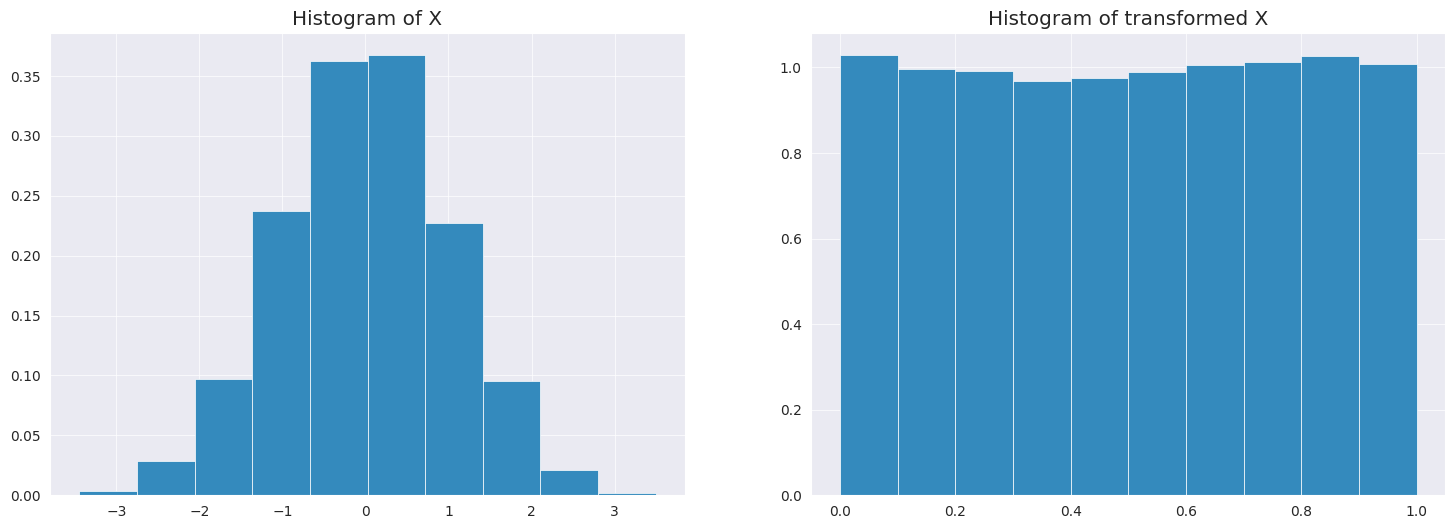

In [4]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.hist(X, density=True, bins=10)
plt.title('Histogram of X')
plt.subplot(122)
plt.hist(X_transformed, density=True, bins=10)
plt.title('Histogram of transformed X')

In [5]:
X = stats.uniform.rvs(size=10000)
X_transformed = stats.norm.ppf(X)

Text(0.5, 1.0, 'Histogram of transformed X')

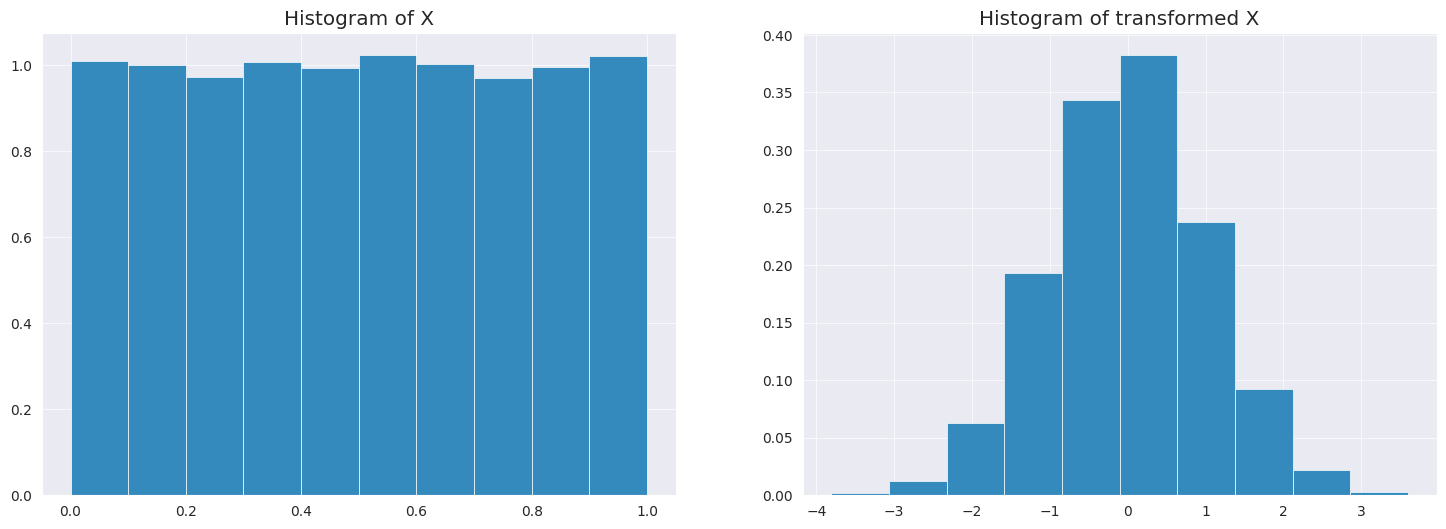

In [6]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.hist(X, density=True, bins=10)
plt.title('Histogram of X')
plt.subplot(122)
plt.hist(X_transformed, density=True, bins=10)
plt.title('Histogram of transformed X')

## Beta distribution
The probability density function (PDF) of the beta distribution, for $0 \leq x \leq 1$, and shape parameters $\alpha, \beta > 0$, is a power function of the variable $x$ and of its reflection $(1 − x)$ as follow:

$$f(x;\alpha ,\beta ) = \frac{x^{\alpha-1}(1-x)^{\beta-1}} {B(\alpha,\beta)}$$

#### Analysis using SymPy

In [55]:
from sympy.stats import Beta, density, E, variance
from sympy import Symbol, simplify, pprint, factor, lambdify

alpha = Symbol("alpha", positive = True)
beta = Symbol("beta", positive = True)
x = Symbol("x")

# Using sympy.stats.Beta() method
X = Beta("x", alpha, beta)
gfg = density(X)(x)
gfg

x**(alpha - 1)*(1 - x)**(beta - 1)/beta(alpha, beta)

$X_1,X_2,\dots,X_d$ are $d$ i.i.d. uniform random variables. Let $Y=\min(X_1,X_2,\dots,X_d)$.
By definition, $F(y)=P(Y\leq y)=1−P(Y>y)=1−P(\min(X_1,X_2,\dots,X_d)>y)$. Of course, $\min(X_1,X_2,\dots,X_d)>y$ exactly when $X_i>y$ for all $i$. Since these variables are i.i.d., we have $F(y)=1−P(X_1>y)P(X_2>y)\dots P(X_d>y)=1−P(X_1>y)^d$.

Assuming the $X_i$ are uniformly distributed on $(a,b)$, this yields
$$F(y) = \left\{
     \begin{array}{ll}
       1 - \left(\frac{b-y}{b-a}\right)^d & : y \in (a, b)\\
       0 & : y < a\\
       1 & : y > b
     \end{array}
\right.$$

We take the derivative to get the density function.
$$f(y) = \left\{
     \begin{array}{ll}
       \frac{d}{b-a} \left(\frac{b-y}{b-a}\right)^{d-1} & : y \in (a, b)\\
       0 & : \text{otherwise}
     \end{array}
\right.$$

if $a=0$, $b=1$ then:
$$f(y) = \left\{
     \begin{array}{ll}
       d \left(1-y\right)^{d-1} & : y \in (0, 1)\\
       0 & : \text{otherwise}
     \end{array}
\right.$$

In the case of QPQ , we are interested in the probability that the aggregated player reports the value $y$ as the minimum value of all the players in the cluster. This corresponds to the probability that all the others players (in the cluster) have values greater than "y". In the case of two independent players and following uniforms, the probability is:

$$ Prb(y=\min(u_2, \dots, u_d)) = \int_y^1\dots \int_y^1 f_{\neq u1}(u_2, \dots, u_d) \,du_2, \dots, \,du_d = (d-1)(1-y)^{(d-2)}$$

This can also be calculated directly without using the density functions, just using the CDFs.
$$F_{\neq u1}(y) = (d-1)P(X_i > y)^{(d-2)} = (d-1)\left(1−P(X_i \leq y)\right)^{(d-2)} = (d-1)(1-y)^{(d-2)}$$


NOTE that this probability corresponds to the PDF of the Beta distribution when $alpha = 1$ and $beta = (d-1)$

At some point we will be interested in knowing the probability mass that exists in a given region. This can also be calculated with CDFs. For example:

$$ Prb(y=\min(u, v)) = \int_0^y \int_y^1 f(u, v) \,du\,dv + \int_0^y \int_y^1 f(u, v) \,dv \,du$$

if $f(x,y) = 1$,  $d=2$ then

$$ Prb(y) = \int_0^y \int_y^1  \,du \,dv + \int_0^y \int_y^1 \,dv \,du = \int_0^y (y-1) \,dv + \int_0^y (y-1)\,du = 2y(1−y) $$

Again, since these variables are i.i.d., we have
$$Prb(y) = \sum_1^d P(X_i\leq y)\prod_{j \neq i}(1− P(X_j\leq y))$$

or
$$Prb(y) = d\cdot P(X_1\leq y)\left(1−P(X_1\leq y)\right)^{(d-1)}$$

In [56]:
from sympy import integrate

u1 = Symbol("u1", positive = True)
u2 = Symbol("u2", positive = True)
u3 = Symbol("u3", positive = True)
z = Symbol("z", positive = True)
# Note the integration order in sympy.
fmin2 = integrate(1, (u2, z, 1), (u1, 0, z)) + integrate(1, (u1, z, 1), (u2, 0, z))
fmin2

2*z*(1 - z)

In [57]:
fmin3 = simplify(integrate(1, (u3, z, 1), (u2, z, 1), (u1, 0, z)) + integrate(1, (u3, z, 1),(u1, z, 1), (u2, 0, z)) + integrate(1, (u1, z, 1),(u2, z, 1), (u3, 0, z)))
fmin3

3*z*(z**2 - 2*z + 1)

In [58]:
fnplayers = simplify(gfg.subs([(alpha, 2), (beta, 3), (x, u2)]))
fnplayers

u2*(u2 - 1)**2/beta(2, 3)

In [59]:
fmin2 = integrate(fnplayers, (u2, z, 1), (u1, 0, z)) + integrate(fnplayers, (u1, z, 1), (u2, 0, z))
simplify(fmin2)

z*(-6*z**4 + 19*z**3 - 20*z**2 + 6*z + 1)/(12*beta(2, 3))

#### Plotting using Panel

In [ ]:
# a panel to explore Beta distribution.
import panel as pn
import holoviews as hv

pn.extension(design='material')
alpha_widget = pn.widgets.EditableFloatSlider(name='Alpha', start=0, end=10, step=0.2, value=2)
beta_widget = pn.widgets.EditableFloatSlider(name='Beta', start=0, end=10, step=0.2, value=5)
@pn.depends(a=alpha_widget, b=beta_widget)
def plot_beta(a, b):
    xs = np.linspace(0,1)
    pr = lambdify(x, gfg.subs([(alphasymbol, a), (betasymbol, b)]), "numpy")
    points = [(i, pr(i)) for i in xs]
    return hv.Curve(points).opts(width=600, framewise=True)

bound_plot = pn.bind(plot_beta, a=alpha_widget, b=beta_widget)
beta_app =  pn.Row(pn.WidgetBox('## Beta Explorer', alpha_widget, beta_widget), bound_plot).servable()

beta_app

#### Plotting using matplotlib and scipy stats

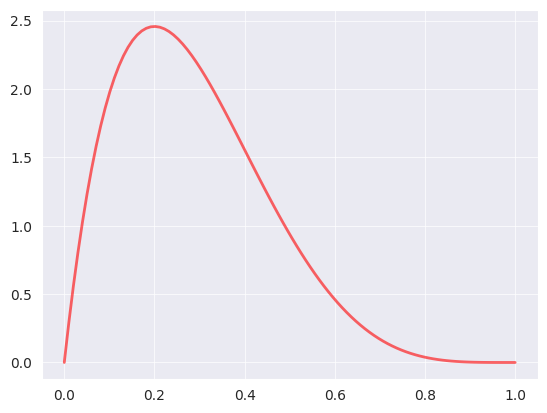

In [62]:
from scipy.stats import beta
fig, ax = plt.subplots(1, 1)
a, b = 2, 5
x = np.linspace(0.0, 1.0, num=100)
ax.plot(x, beta.pdf(x, a, b),'r-', lw=2, alpha=0.6, label='beta pdf')
plt.show()

#### Simulating using matplotlib and scipy stats

[Text(0.5, 1.0, 'Histogram of B(2,5)'),
 Text(0.5, 0, 'Value'),
 Text(0, 0.5, 'Frequency')]

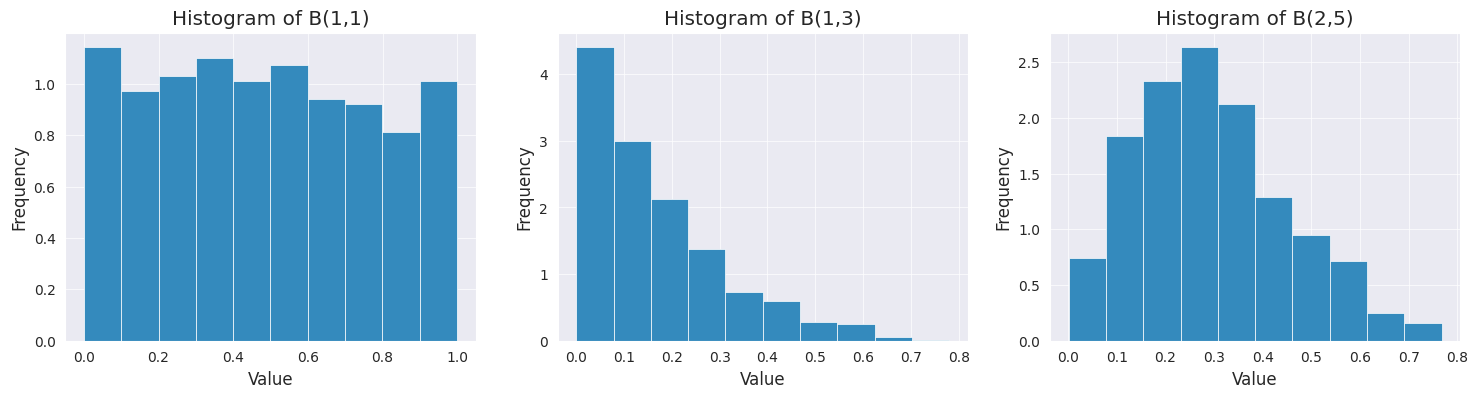

In [63]:
samples = 1000
fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
ax[0].hist(beta(1,1).rvs(size=samples), density=True)
ax[0].set(title='Histogram of B(1,1)', xlabel='Value', ylabel='Frequency')
ax[1].hist(beta(1,5).rvs(size=samples), density=True)
ax[1].set(title='Histogram of B(1,3)', xlabel='Value', ylabel='Frequency')
ax[2].hist(beta(2,5).rvs(size=samples), density=True)
ax[2].set(title='Histogram of B(2,5)', xlabel='Value', ylabel='Frequency')

#### Simulating the min of players' values

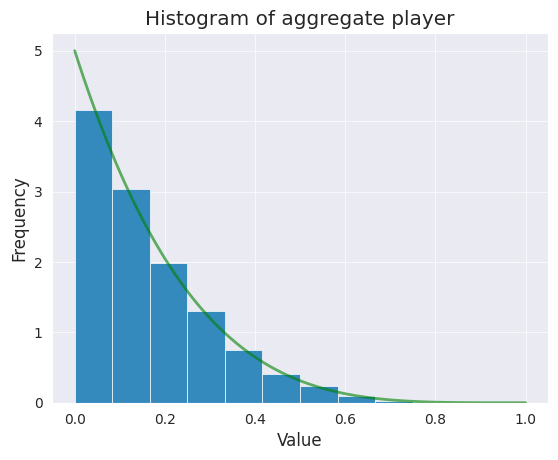

In [50]:
from scipy.stats import uniform
from scipy.stats import beta
players = 5
samples = 10000
vals = np.empty(shape=[players, samples])
for p in range(players):
    vals[p,] = uniform.rvs(size=samples)

fig, ax = plt.subplots(1, 1)
ax.hist(vals.min(0), density=True)
ax.set(title='Histogram of aggregate player', xlabel='Value', ylabel='Frequency')
a, b = 1, players
x = np.linspace(0.0, 1.0, num=100)
ax.plot(x, beta.pdf(x, a, b),'g-', lw=2, alpha=0.6, label='beta pdf')
plt.show()

## Product copula (independent variables)

In [65]:
dist_x = stats.uniform()
dist_y = stats.beta(1, 3)

In [66]:
X = dist_x.rvs(size=10000)
Y = dist_y.rvs(size=10000)

[Text(0.5, 1.0, 'Scatterplot of X and Y'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y')]

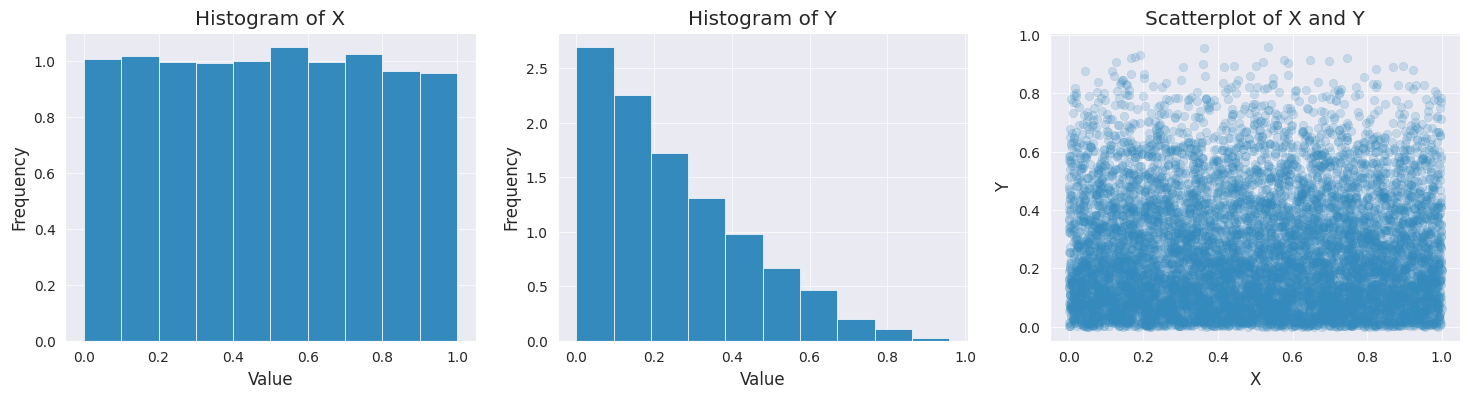

In [67]:
fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
ax[0].hist(X, density=True)
ax[0].set(title='Histogram of X', xlabel='Value', ylabel='Frequency')
ax[1].hist(Y, density=True)
ax[1].set(title='Histogram of Y', xlabel='Value', ylabel='Frequency')
ax[2].scatter(X,Y, alpha=0.2)
ax[2].set(title='Scatterplot of X and Y', xlabel='X', ylabel='Y')

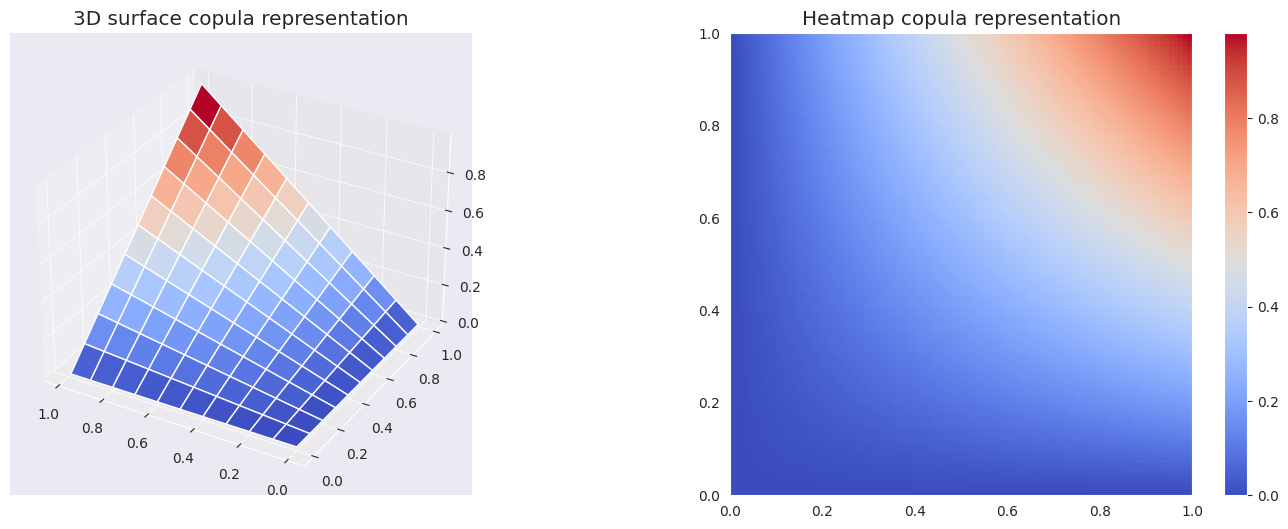

In [68]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(18,6))
ax0 = fig.add_subplot(121, projection='3d')
ax1 = fig.add_subplot(122)

x = np.arange(0,1,0.01)
y = np.arange(0,1,0.01)
x,y = np.meshgrid(x,y)

# apply inverse CDF to each point on a grid
pairs = np.array([[i, j] for (i,j) in zip(dist_x.ppf(x).flatten(),dist_y.ppf(y).flatten())])
# calculate the product of two CDFs for each point on a grid
z = dist_x.cdf(pairs[:,0]).reshape([100,100]) * dist_y.cdf(pairs[:,1]).reshape([100,100])

ax0.plot_surface(x, y, z, cmap=cm.coolwarm, rstride=10, cstride=10, linewidth=1)
#ax0.invert_yaxis()
ax0.invert_xaxis()
ax0.set(title='3D surface copula representation')
img = ax1.imshow(np.flip(z,axis=0), cmap=cm.coolwarm, extent=[0,1,0,1])
ax1.grid(False)
ax1.set(title='Heatmap copula representation')
fig.colorbar(img)

[Text(0.5, 1.0, 'Scatterplot of transformed X and Y'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y')]

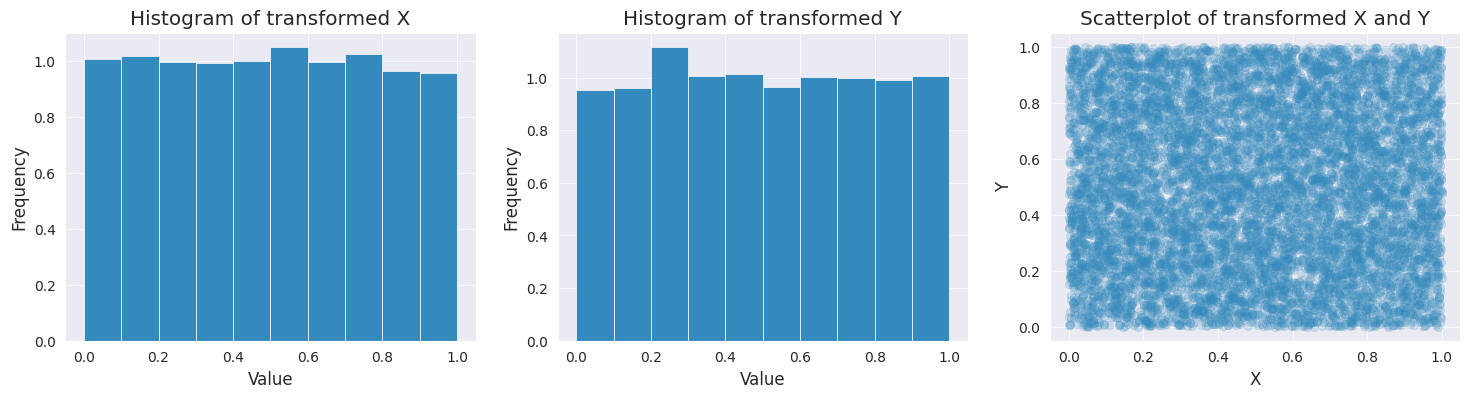

In [69]:
fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
ax[0].hist(dist_x.cdf(X), density=True)
ax[0].set(title='Histogram of transformed X', xlabel='Value', ylabel='Frequency')
ax[1].hist(dist_y.cdf(Y), density=True)
ax[1].set(title='Histogram of transformed Y', xlabel='Value', ylabel='Frequency')
ax[2].scatter(dist_x.cdf(X), dist_y.cdf(Y), alpha=0.2)
ax[2].set(title='Scatterplot of transformed X and Y', xlabel='X', ylabel='Y')

## Computing declared value of the aggregate player
### Independent uniform distribution
As we saw before, the aggregate player will repot values with probability:
.
$$F_{\neq u1}(y) = (d-1)P(X_i > y)^{(d-2)} = (d-1)\left(1−P(X_i \leq y)\right)^{(d-2)} = (d-1)(1-y)^{(d-2)}$$
     
### General case: correlated distribution
The copula of $(X_{1},X_{2},\dots ,X_{d})$ is defined as the joint cumulative distribution function of $(U_{1},U_{2},\dots ,U_{d})$:

$$ C(u_{1},u_{2},\dots ,u_{d})=\Pr[U_{1}\leq u_{1},U_{2}\leq u_{2},\dots ,U_{d}\leq u_{d}] $$,

where $U_i = F_i(X_i)$ is the marginal CDFs of $X_i$.
The probability of the aggregate player could be calculate using its copula.

First, note that we are interested in:
$$Pr(y)=\sum_{i\in D} Pr_{i \notin D} (X_{j \neq i} > y|X_i=y) \tag{1}$$


To calculate the conditional probability, I must use the following:
$${\displaystyle Pr(A\mid B)={\frac {Pr(A\cap B)}{Pr(B)}}}$$

 Given a bivariate copula $C(u,v)$, a bivariate CDF $H(x,y)$ and marginal CDFs $F(x)$ and $G(y)$ with $H(x,y)=C(F(x),G(y))$. Then (with some abuse of notation):

$$\begin{align*}
$Pr(X \leq x | Y=y) & = \frac{Pr(X \leq x, Y=y)}{Pr(Y=y)} \\
& = \frac{\frac{\partial}{\partial v} C(F(x), G(y)) \cdot g(y)}{g(y)} \\
& = \frac{\partial}{\partial v} C(F(x), G(y))
\end{align*}$$

In our case (assuming that marginals are uniform):
$$\begin{align*}
Pr_{i \notin D} (X_{j \neq i} > y|X_i=y) & = \frac{Pr(X_{j \neq i} > y, X_i=y)}{Pr(X_i=y)} \\ & = \frac{\frac{\partial}{\partial u_i} C(1-F_1(y), \dots, F_i(y), \dots, 1-F_d(y)) \cdot f_i(y)}{f_i(y)} \\ & = \frac{\partial}{\partial u_i} C(1-y,\dots y,\dots,1-y)
\end{align*}$$

And finally:

$$Pr(y)=\sum_{i\in D} Pr_{i \notin D} (X_{j \neq i} > y|X_i=y) = \frac{\partial}{\partial u_i} C(1-y,\dots y,\dots,1-y) \tag{2}$$

When $C(u_1,\cdots,u_{d-1}) = \prod_{i=1}^{d-1}u_i$, then
$$\frac{\partial}{\partial u_i} C(1-y,\dots y,\dots,1-y) =  (1-y)^{(d-2)}$$
and
$$ Pr(y) = (d-1)(1-y)^{(d-2)}$$
as expected for the independent copula.

Some references:
* http://scik.org/index.php/jmcs/article/view/5932
* https://www.casact.org/sites/default/files/old/02pcas_venter.pdf
* https://cran.r-project.org/web/packages/copBasic/copBasic.pdf
* https://stats.stackexchange.com/questions/124865/sampling-from-conditional-copula
*

# Archimedean copulas

A copula C is called Archimedean if it admits the representation:
$${\displaystyle C(u_{1},\dots ,u_{d};\theta )=\psi ^{[-1]}\left(\psi (u_{1};\theta )+\cdots +\psi (u_{d};\theta );\theta \right)}$$

## Gumbel copula

### Introduction
The Gumbel copula is an Archimedean copula where tHe generator is $\psi _{\theta }(t) = \left(-\log(t)\right)^{\theta }$ and the generator inverse is $\psi _{\theta }^{-1}(t) = \exp \!\left(-t^{1/\theta }\right)$.

The bivariate Gumbel copula is defined as:

$$C_\theta(u_1, u_2) := \exp \{-[(- \ln u_1)^\theta + (-\ln u_2)^\theta ]^\frac{1}{\theta}\}$$

where $ \theta \in [1, \infty] $. When $ \theta = 1 $  we obtain the independence copula. When $\theta \to \infty $ the Gumbel copula converges to the comonotonicity copula.




In [5]:
from sympy import *

# define variables
u1, u2, u3, z = symbols('u1 u2 u3 z', nonnegative=True)
theta = Symbol("theta", positive=True)
# define Gumbel copula function for 2 RV
Cgumbel2 = exp(-pow(pow(-ln(u1), theta)+pow(-ln(u2), theta), 1/theta))
# calculate and simplify Copula family expression
simplify(Cgumbel2)

exp(-((-log(u1))**theta + (-log(u2))**theta)**(1/theta))

In [6]:
# compute the density. Just for curiosity
fgumbel2 = simplify(diff(Cgumbel2, u1, u2))
fgumbel2

(-log(u1))**theta*(-log(u2))**theta*((-log(u1))**theta + (-log(u2))**theta)**(-2 + 1/theta)*(theta + ((-log(u1))**theta + (-log(u2))**theta)**(1/theta) - 1)*exp(-((-log(u1))**theta + (-log(u2))**theta)**(1/theta))/(u1*u2*log(u1)*log(u2))

In [7]:
# First, check that the Gumbel Copula is the independent copula when Theta = 1
Cgumbel2.subs(theta, 1)

u1*u2

In [8]:
# As before but using density
fgumbel2.subs(theta, 1)

1

### Aggregated Player

To see how $d-1$ players could be replace by an aggregate player, suppose $U_1,\cdots,U_d$  are RVs with uniform distributions and correlated by a Gumbel Copula.

Using equation (2), the distribution function of the aggregate player (minimun declared value) and :
$$Pr(y) = \sum_{i\in D} \frac{\partial}{\partial u_i} C(1-U_1(y), \dots, U_i(y), \dots, 1-U_d(y))$$

Using:
$$C(u_1, u_2) = e^{- \left(\left(- \log{\left(u_{1} \right)}\right)^{\theta} + \left(- \log{\left(u_{2} \right)}\right)^{\theta}\right)^{\frac{1}{\theta}}}$$

The partial derivative of the Gumble copula with uniform marginals is:
$$\frac{\partial}{\partial u_1} C(u_1, u_2) = - \frac{\left(- \log{\left(u_{1} \right)}\right)^{\theta} \left(\left(- \log{\left(u_{1} \right)}\right)^{\theta} + \left(- \log{\left(u_{2} \right)}\right)^{\theta}\right)^{- \frac{\theta - 1}{\theta}} e^{- \left(\left(- \log{\left(u_{1} \right)}\right)^{\theta} + \left(- \log{\left(u_{2} \right)}\right)^{\theta}\right)^{\frac{1}{\theta}}}}{u_{1} \log{\left(u_{1} \right)}}
$$

For two players:
$$ Pr(y) = \frac{\partial}{\partial u_1} \left[C(y, 1-y)\right] +\frac{\partial}{\partial u_2} \left[C(1-y, y)\right]$$

$$ Pr(y) = - \frac{2 \left(- \log{\left(y \right)}\right)^{\theta} \left(\left(- \log{\left(y \right)}\right)^{\theta} + \left(- \log{\left(1 - y \right)}\right)^{\theta}\right)^{- \frac{\theta - 1}{\theta}} e^{- \left(\left(- \log{\left(y \right)}\right)^{\theta} + \left(- \log{\left(1 - y \right)}\right)^{\theta}\right)^{\frac{1}{\theta}}}}{y \log{\left(y \right)}}
$$
And for $d-1$ players:
$$ F (y) = - \frac{(d-1) \left(- \log{\left(y \right)}\right)^{\theta} \left(\left(- \log{\left(y \right)}\right)^{\theta} + (d-2)\left(- \log{\left(1 - y \right)}\right)^{\theta}\right)^{- \frac{\theta - 1}{\theta}} e^{- \left(\left(- \log{\left(y \right)}\right)^{\theta} + (d-2)\left(- \log{\left(1 - y \right)}\right)^{\theta}\right)^{\frac{1}{\theta}}}}{y \log{\left(y \right)}}$$

References:
* https://mediatum.ub.tum.de/doc/1119201/document.pdf (page 17)

Notas: Tengo que comprobar lo siguiente:
- Para $\theta = 1$ esa ecuación es similar a la beta de independientes.
- La ecuación anterior es cierta??  **Nota: creo que no, algo está mal. No coincide con las simulaciones ☹**
- Ver qué forma tiene la ecuación y cómo cambia cuando $\theta$ y $d$ cambian
- Simular varios jugadores correlados y comprobar que se corresponde con la ecuación anterior
- Calcular la copula de un jugador con la agregación de n. ¿es la misma que tenemos de origen? ¿Se mantiene una Gumble aunque cambie $\theta$?

In [19]:
dGumble_u1 = simplify(diff(Cgumbel2, u1))
dGumble_u2 = simplify(diff(Cgumbel2, u2))
dGumble_u1 + dGumble_u2

-(-log(u2))**theta*exp(-((-log(u1))**theta + (-log(u2))**theta)**(1/theta))/(u2*((-log(u1))**theta + (-log(u2))**theta)**((theta - 1)/theta)*log(u2)) - (-log(u1))**theta*exp(-((-log(u1))**theta + (-log(u2))**theta)**(1/theta))/(u1*((-log(u1))**theta + (-log(u2))**theta)**((theta - 1)/theta)*log(u1))

In [21]:
print_latex(dGumble_u1)

- \frac{\left(- \log{\left(u_{1} \right)}\right)^{\theta} \left(\left(- \log{\left(u_{1} \right)}\right)^{\theta} + \left(- \log{\left(u_{2} \right)}\right)^{\theta}\right)^{- \frac{\theta - 1}{\theta}} e^{- \left(\left(- \log{\left(u_{1} \right)}\right)^{\theta} + \left(- \log{\left(u_{2} \right)}\right)^{\theta}\right)^{\frac{1}{\theta}}}}{u_{1} \log{\left(u_{1} \right)}}


In [23]:
# The probability that player 1 declares the minimum value (=z) and the other playeer says a higher value plus
# the probability that player 2 reports z and player 1 says something higher
prMax2 = simplify(dGumble_u1.subs([(u1,z), (u2,1-z)]) + dGumble_u2.subs([(u1,1-z), (u2,z)]))
prMax2

-2*(-log(z))**theta*exp(-((-log(z))**theta + (-log(1 - z))**theta)**(1/theta))/(z*((-log(z))**theta + (-log(1 - z))**theta)**((theta - 1)/theta)*log(z))

In [26]:
y= Symbol("y")
print_latex(prMax2.subs(z,y))

- \frac{2 \left(- \log{\left(y \right)}\right)^{\theta} \left(\left(- \log{\left(y \right)}\right)^{\theta} + \left(- \log{\left(1 - y \right)}\right)^{\theta}\right)^{- \frac{\theta - 1}{\theta}} e^{- \left(\left(- \log{\left(y \right)}\right)^{\theta} + \left(- \log{\left(1 - y \right)}\right)^{\theta}\right)^{\frac{1}{\theta}}}}{y \log{\left(y \right)}}


In [11]:
simplify(prMax2.subs(theta, 1))

2 - 2*z

In [12]:
simplify(prMax2.subs(theta, 3.01))

-2*(-log(z))**3.01*exp(-((-log(z))**3.01 + (-log(1 - z))**3.01)**0.332225913621262)/(z*((-log(z))**3.01 + (-log(1 - z))**3.01)**0.667774086378737*log(z))

In [41]:
# define Gumbel copula function for 3 RV
Cgumbel3 = exp(-pow(pow(-ln(u1), theta)+pow(-ln(u2), theta)+pow(-ln(u3), theta), 1/theta))
# calculate and simplify Copula family expression
simplify(Cgumbel3)

exp(-((-log(u1))**theta + (-log(u2))**theta + (-log(u3))**theta)**(1/theta))

In [44]:
dGumble_u1 = simplify(diff(Cgumbel3, u1))
dGumble_u2 = simplify(diff(Cgumbel3, u2))
dGumble_u3 = simplify(diff(Cgumbel3, u3))
prMax3 = (dGumble_u1.subs([(u1,z), (u2,1-z), (u3,1-z)]) + dGumble_u2.subs([(u1,1-z), (u2,z), (u3,1-z)]) + dGumble_u3.subs([(u1,1-z), (u2,1-z), (u3,z)]))
prMax3

-3*(-log(z))**theta*exp(-((-log(z))**theta + 2*(-log(1 - z))**theta)**(1/theta))/(z*((-log(z))**theta + 2*(-log(1 - z))**theta)**((theta - 1)/theta)*log(z))

In [115]:
prMax3.subs(theta, 1)

3*(1 - z)**2

<lambdifygenerated-2>:2: RuntimeWarning: divide by zero encountered in log
  return -2*exp(-(log(z)**10 + log(1 - z)**10)**(1/10))*log(z)**9/(z*(log(z)**10 + log(1 - z)**10)**(9/10))
<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in multiply
  return -2*exp(-(log(z)**10 + log(1 - z)**10)**(1/10))*log(z)**9/(z*(log(z)**10 + log(1 - z)**10)**(9/10))


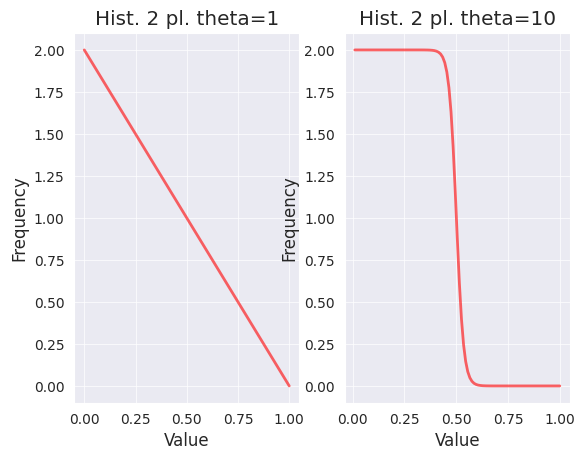

In [30]:
fig, ax = plt.subplots(1, 2)
x = np.linspace(0.0, 1.0, num=100)
pr1 = lambdify(z, prMax2.subs(theta, 1), "numpy")
pr10 = lambdify(z, prMax2.subs(theta, 10), "numpy")
ax[0].plot(x, pr1(x),'r-', lw=2, alpha=0.6, label='Pr Theta=1')
ax[0].set(title='Hist. 2 pl. theta=1', xlabel='Value', ylabel='Frequency')
ax[1].plot(x, pr10(x),'r-', lw=2, alpha=0.6, label='Pr Theta=1')
ax[1].set(title='Hist. 2 pl. theta=10', xlabel='Value', ylabel='Frequency')
plt.show()

In [39]:
# a panel to explore Beta distribution.
import panel as pn
import holoviews as hv

pn.extension(design='material')
theta_widget = pn.widgets.EditableFloatSlider(name='Theta', start=1, end=10, step=0.2, value=1)
@pn.depends(t=theta_widget)
def plot_gumbel_aggregate2(t):
    xs = np.linspace(0,1)
    pr = lambdify(z, prMax2.subs(theta, t), "numpy")
    points = [(i, pr(i)) for i in xs]
    return hv.Curve(points).opts(width=600, framewise=True)

@pn.depends(t=theta_widget)
def plot_gumbel_aggregate3(t):
    xs = np.linspace(0,1)
    pr = lambdify(z, prMax3.subs(theta, t), "numpy")
    points = [(i, pr(i)) for i in xs]
    return hv.Curve(points).opts(width=600, framewise=True)


bound_gumble2_plot = pn.bind(plot_gumbel_aggregate2, t=theta_widget)
bound_gumble3_plot = pn.bind(plot_gumbel_aggregate3, t=theta_widget)
gumble_app =  pn.Column(pn.WidgetBox('## Gumble Explorer', theta_widget), bound_gumble2_plot, bound_gumble3_plot).servable()

gumble_app

NameError: ignored

### Simulation

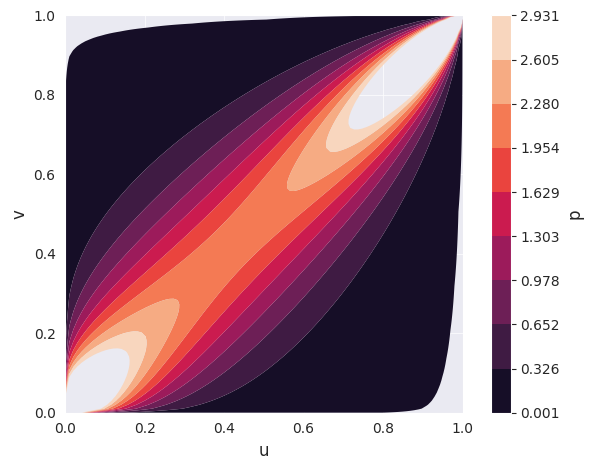

In [35]:
from statsmodels.distributions.copula.api import (CopulaDistribution, GumbelCopula, IndependenceCopula)

default_rng = np.random.default_rng()
copula2 = GumbelCopula(theta=3.0)
_ = copula2.plot_pdf()  # returns a matplotlib figure

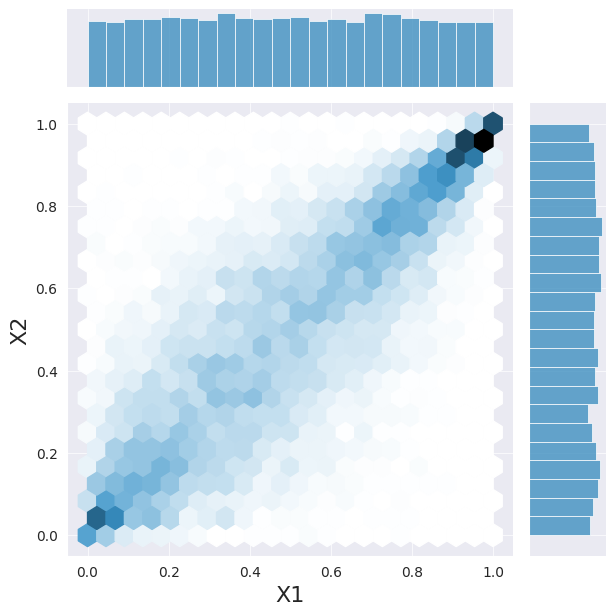

In [36]:
import numpy as np

sample = copula2.rvs(10000, random_state=default_rng)
h = sns.jointplot(x=sample[:, 0], y=sample[:, 1], kind="hex")
_ = h.set_axis_labels("X1", "X2", fontsize=16)

<lambdifygenerated-4>:2: RuntimeWarning: divide by zero encountered in log
  return -2*(-log(z))**30.0001*((-log(z))**30.0001 + (-log(1 - z))**30.0001)**(-0.966666777777407)*exp(-((-log(z))**30.0001 + (-log(1 - z))**30.0001)**0.0333332222225926)/(z*log(z))
<lambdifygenerated-4>:2: RuntimeWarning: invalid value encountered in multiply
  return -2*(-log(z))**30.0001*((-log(z))**30.0001 + (-log(1 - z))**30.0001)**(-0.966666777777407)*exp(-((-log(z))**30.0001 + (-log(1 - z))**30.0001)**0.0333332222225926)/(z*log(z))
<lambdifygenerated-4>:2: RuntimeWarning: invalid value encountered in true_divide
  return -2*(-log(z))**30.0001*((-log(z))**30.0001 + (-log(1 - z))**30.0001)**(-0.966666777777407)*exp(-((-log(z))**30.0001 + (-log(1 - z))**30.0001)**0.0333332222225926)/(z*log(z))


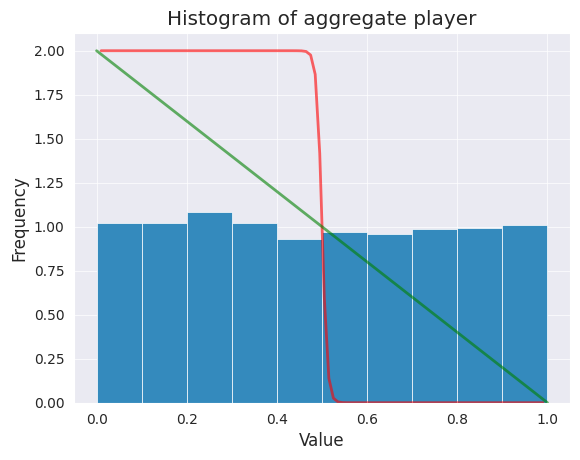

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

players = 2
samples = 10000
t=30.0001

copula3 = GumbelCopula(theta=t, k_dim=players)
vals = copula3.rvs(samples, random_state=default_rng)

# Creating figure
fig, ax = plt.subplots(1, 1)
ax.hist(vals.min(1), density=True)
ax.set(title='Histogram of aggregate player', xlabel='Value', ylabel='Frequency')

x = np.linspace(0.0, 1.0, num=100)
pr = lambdify(z, prMax2.subs(theta, t), "numpy")
ax.plot(x, pr(x),'r-', lw=2, alpha=0.6, label='beta pdf')
ax.plot(x, beta.pdf(x, 1, players),'g-', lw=2, alpha=0.6, label='beta pdf')
plt.show()

In [62]:
beta.pdf

<bound method rv_continuous.pdf of <scipy.stats._continuous_distns.beta_gen object at 0x7f57c0dc23e0>>

### Copula of the aggregated Player

A copula C is called Archimedean if it admits the representation:
$${\displaystyle C(u_{1},\dots ,u_{d};\theta )=\psi ^{[-1]}\left(\psi (u_{1};\theta )+\dots +\psi (u_{d};\theta );\theta \right)}$$

The idea is to reduce this formulation to two players where one of the is the aggregate player reporting the mininum value of her cluster:

$${\displaystyle C(u_{1},u_{a};\theta)=\psi ^{[-1]}\left(\psi (u_{1};\theta )+\psi (u_{a};\theta );\theta \right)}$$

The question is we could find the relation between $\psi (u_{a};\theta )$ and $\psi (u_{2};\theta ), \dots, \psi (u_{d};\theta)$

In the case of the Gumble copula, we know that $u_a$ has the marginal $$ F_a(y) = (d-1) \exp (-((- \ln y)^\theta + (d-2)(-\ln (1-y))^\theta  )^\frac{1}{\theta})$$

a ver donde me lleva esto...
$$  C(u_{1},u_{a};\theta) = \exp \!\left(-(\left(-\log(u_1)\right)^{\theta} + \left(-\log(u_a)\right)^{\theta }) ^{1/\theta }\right) $$


In [19]:
from sympy import *

# define variables
u1, u2, ua, theta, d, z = symbols('u1 u2 ua theta d z', real=True)
# define Gumbel copula function for 2 RV
Cgumbel2 = exp(-pow(pow(-ln(u1), theta)+pow(-ln(u2), theta), 1/theta))
# calculate and simplify Copula family expression
simplify(Cgumbel2)

exp(-((-log(u1))**theta + (-log(u2))**theta)**(1/theta))

In [25]:
Fy = (d-1)*exp(-pow(pow(-ln(ua), theta)+(d-2)*pow(-ln(1-ua), theta), 1/theta))
Fy

(d - 1)*exp(-((-log(ua))**theta + (-log(1 - ua))**theta*(d - 2))**(1/theta))

In [26]:
Cgumbel3 = simplify(Cgumbel2.subs(u2, Fy))
Cgumbel3

exp(-((-log(u1))**theta + (-log((d - 1)*exp(-((-log(ua))**theta + (-log(1 - ua))**theta*(d - 2))**(1/theta))))**theta)**(1/theta))

In [27]:
simplify(Cgumbel3.subs(d, 2))

exp(-((-log(u1))**theta + (-log(exp(-((-log(ua))**theta)**(1/theta))))**theta)**(1/theta))

In [29]:
simplify(Cgumbel3.subs([(d, 3), (theta, 1)]))

2*u1*ua*(1 - ua)

## Ali-Mikhail-Haq family of copulas

### Introduction

In [ ]:
from sympy import *

# define variables
u, v, theta, z = symbols('u v theta z')
# define copula function
cop = u*v/(1 - theta*(1-u)*(1-v))
# calculate and simplify Copula family expression
simplify(cop)

-u*v/(theta*(u - 1)*(v - 1) - 1)

In [ ]:
f = simplify(diff(cop, u, v))
f

(-2*theta**2*u*v*(u - 1)*(v - 1) + theta*(theta*(u - 1)*(v - 1) - 1)*(u*v + u*(v - 1) + v*(u - 1)) - (theta*(u - 1)*(v - 1) - 1)**2)/(theta*(u - 1)*(v - 1) - 1)**3

In [ ]:
prMax = simplify(integrate(f, (u, z, 1),(v, 0, u)) + integrate(f, (v, z, 1),(u, 0, v)))
prMax

u + v - (theta*z**2 - theta*z + z)/(theta**2*z**2 - 2*theta**2*z + theta**2 + theta*z - theta - v*(theta**2*z**2 - 2*theta**2*z + theta**2)) - (theta*z**2 - theta*z + z)/(theta**2*z**2 - 2*theta**2*z + theta**2 + theta*z - theta - u*(theta**2*z**2 - 2*theta**2*z + theta**2)) + 2*(theta*z**2 - theta*z + z)/(theta**2*z**2 - 2*theta**2*z + theta**2 + theta*z - theta)

In [ ]:
cop.subs(theta, 0)

u*v

In [ ]:
f.subs(theta, 0)

1

## Gaussian copula

In [ ]:
# define copula parameters
rho = 0.8
mu_c = np.array([0,0])
cov_c = np.array([[1,rho],[rho,1]])
# define multivariate normal distribution
dist_c = stats.multivariate_normal(mean=mu_c, cov=cov_c)
# sample from the distribution
sample_c = dist_c.rvs(size=10000)

In [ ]:
# obtain marginals X and Y
X = sample_c[:,0]
Y = sample_c[:,1]

[Text(0.5, 1.0, 'Scatterplot of X and Y'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y')]

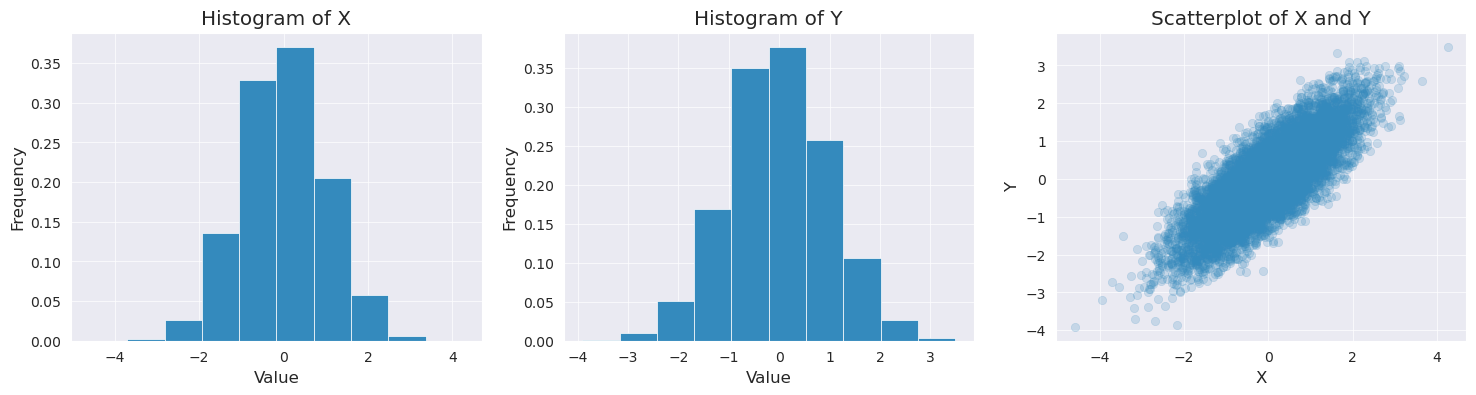

In [ ]:
# plot marginals and joint distribution
fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
ax[0].hist(X, density=True)
ax[0].set(title='Histogram of X', xlabel='Value', ylabel='Frequency')
ax[1].hist(Y, density=True)
ax[1].set(title='Histogram of Y', xlabel='Value', ylabel='Frequency')
ax[2].scatter(X, Y, alpha=0.2)
ax[2].set(title='Scatterplot of X and Y', xlabel='X', ylabel='Y')

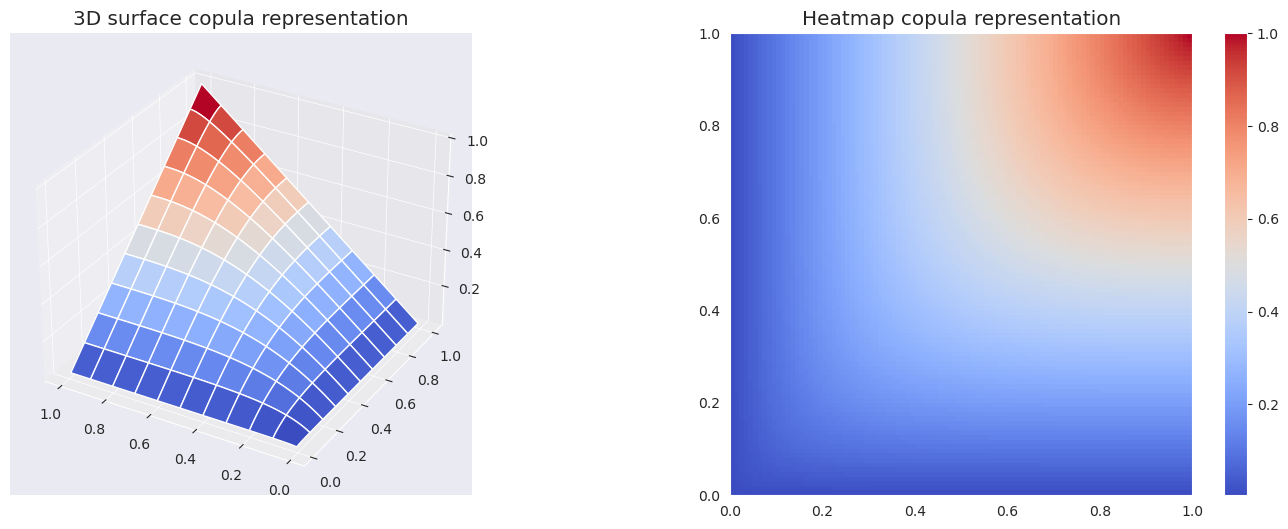

In [ ]:
# create a grid
x = np.arange(0.01,1.01,0.01)
y = np.arange(0.01,1.01,0.01)
x,y = np.meshgrid(x,y)

# apply inverse standard normal CDF to each point on a grid
pairs = np.array([[i, j] for (i,j) in zip(stats.norm.ppf(x).flatten(),stats.norm.ppf(y).flatten())])
# calculate the value of bivariate normal CDF for each point on a grid
z = dist_c.cdf(pairs).reshape([100,100])

# plot the resulting copula
fig = plt.figure(figsize=(18,6))
ax0 = fig.add_subplot(121, projection='3d')
ax1 = fig.add_subplot(122)
ax0.plot_surface(x, y, z, cmap=cm.coolwarm, rstride=10, cstride=10, linewidth=1)
#ax0.invert_yaxis()
ax0.invert_xaxis()
ax0.set(title='3D surface copula representation')
img = ax1.imshow(np.flip(z,axis=0), cmap=cm.coolwarm, extent=[0,1,0,1])
ax1.grid(False)
ax1.set(title='Heatmap copula representation')
fig.colorbar(img)

[Text(0.5, 1.0, 'Scatterplot of transformed X and Y'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y')]

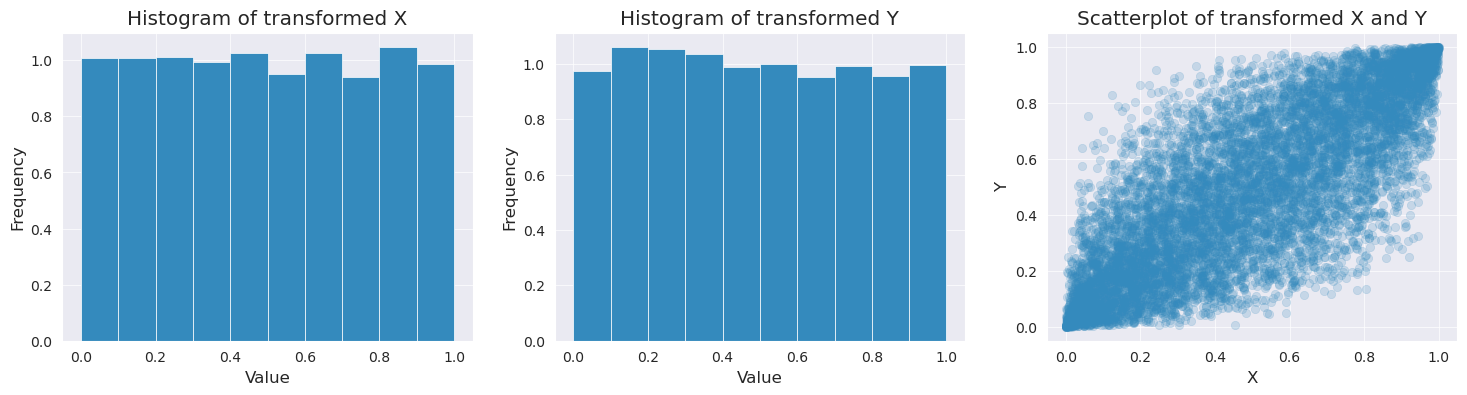

In [ ]:
# transform marginals to uniform
u_x = stats.norm.cdf(X)
u_y = stats.norm.cdf(Y)

# plot marginals and joint distribution
fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
ax[0].hist(u_x, density=True)
ax[0].set(title='Histogram of transformed X', xlabel='Value', ylabel='Frequency')
ax[1].hist(u_y, density=True)
ax[1].set(title='Histogram of transformed Y', xlabel='Value', ylabel='Frequency')
ax[2].scatter(u_x, u_y, alpha=0.2)
ax[2].set(title='Scatterplot of transformed X and Y', xlabel='X', ylabel='Y')

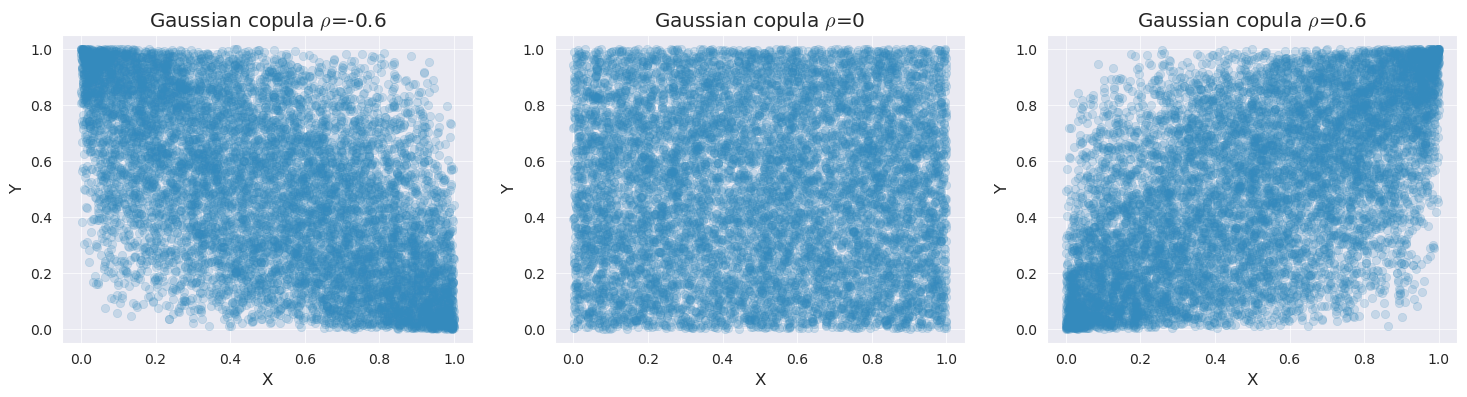

In [ ]:
fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)

for i,rho in zip([0,1,2],[-0.6, 0, 0.6]):
    mu_c = np.array([0,0])
    cov_c = np.array([[1,rho],[rho,1]])
    dist_c = stats.multivariate_normal(mean=mu_c, cov=cov_c)
    sample_c = dist_c.rvs(size=10000)

    X = sample_c[:,0]
    Y = sample_c[:,1]
    u_x = stats.norm.cdf(X)
    u_y = stats.norm.cdf(Y)
    ax[i].scatter(u_x, u_y, alpha=0.2)
    ax[i].set(title=r'Gaussian copula $\rho$=' + str(rho), xlabel='X', ylabel='Y')

[Text(0.5, 1.0, 'Joint distribution derived from copula'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y')]

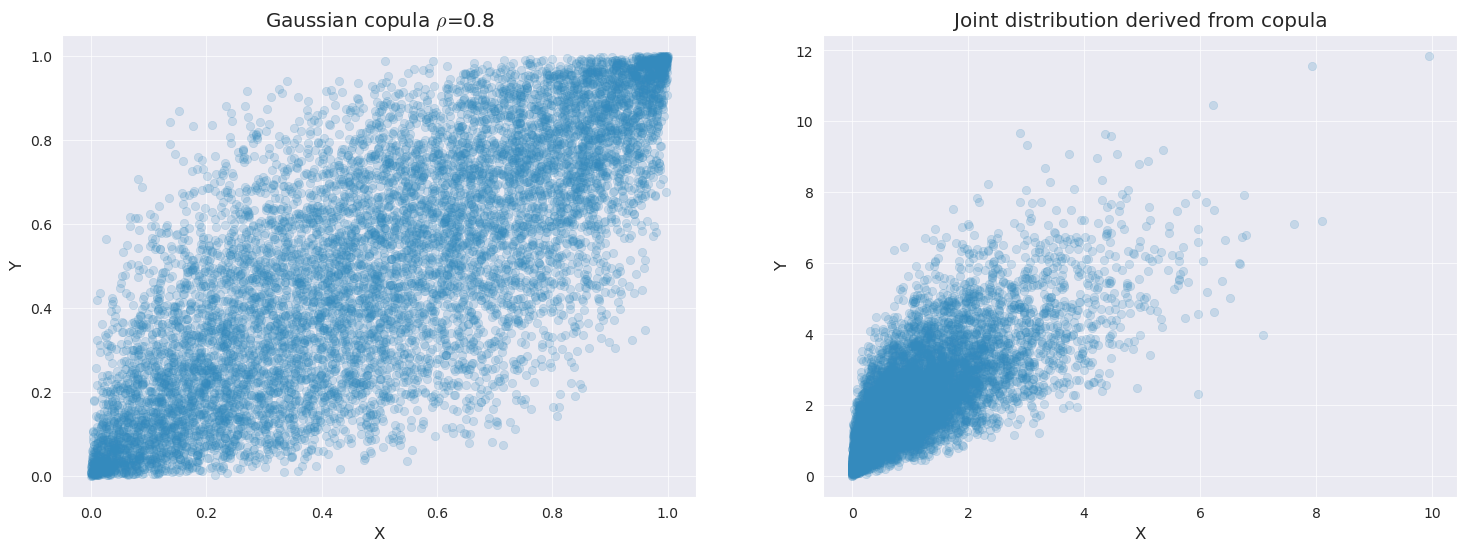

In [ ]:
# define copula parameters
rho=0.8
mu_c = np.array([0,0])
cov_c = np.array([[1,rho],[rho,1]])
dist_c = stats.multivariate_normal(mean=mu_c, cov=cov_c)
sample_c = dist_c.rvs(size=10000)

# transform marginals to uniform
X = sample_c[:,0]
Y = sample_c[:,1]
u_x = stats.norm.cdf(X)
u_y = stats.norm.cdf(Y)
# define required marginal distributions
dist_x = stats.expon()
dist_y = stats.gamma(a=2)

fig, ax = plt.subplots(figsize=(18,6), nrows=1, ncols=2)
ax[0].scatter(u_x, u_y, alpha=0.2)
ax[0].set(title=r'Gaussian copula $\rho$=' + str(rho), xlabel='X', ylabel='Y')
ax[1].scatter(dist_x.ppf(u_x), dist_y.ppf(u_y), alpha=0.2)
ax[1].set(title='Joint distribution derived from copula', xlabel='X', ylabel='Y')

Text(0.5, 0.98, 'Joint distribution from Gaussian copula ($\\rho=0.8$)')

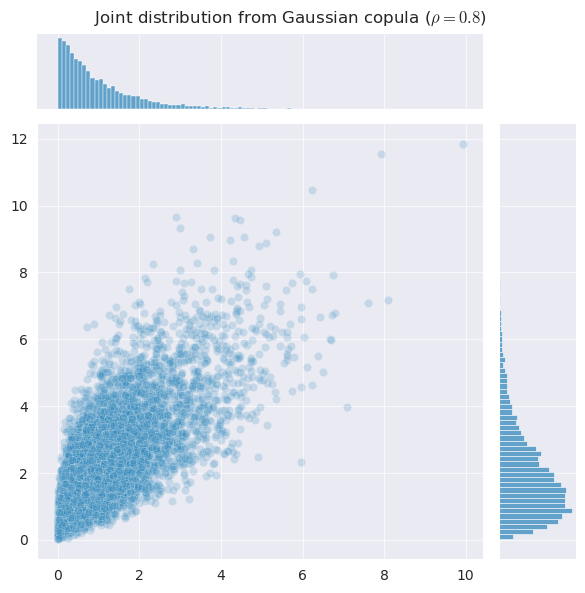

In [ ]:
r = sns.jointplot(x=dist_x.ppf(u_x), y=dist_y.ppf(u_y), alpha=0.2)
r.fig.subplots_adjust(top=.94)
r.fig.suptitle(r'Joint distribution from Gaussian copula ($\rho=0.8$)')

[Text(0.5, 1.0, 'Joint distribution derived from copula'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y')]

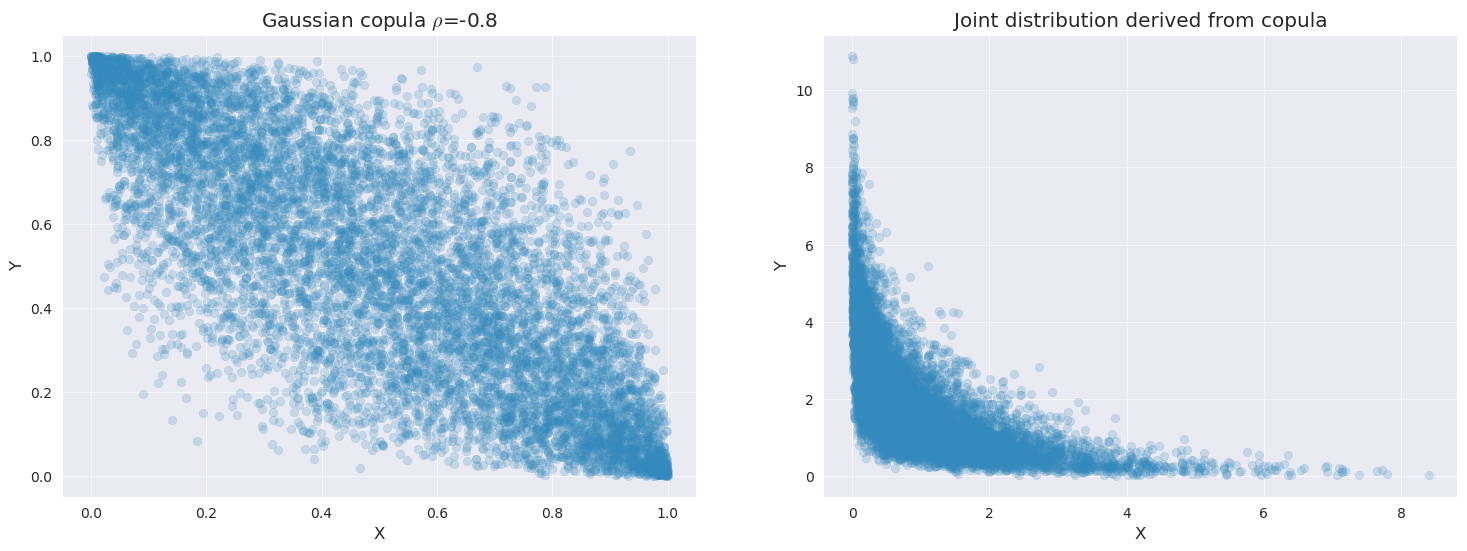

In [ ]:
# define copula parameters
rho=-0.8
mu_c = np.array([0,0])
cov_c = np.array([[1,rho],[rho,1]])
dist_c = stats.multivariate_normal(mean=mu_c, cov=cov_c)
sample_c = dist_c.rvs(size=10000)

# transform marginals to uniform
X = sample_c[:,0]
Y = sample_c[:,1]
u_x = stats.norm.cdf(X)
u_y = stats.norm.cdf(Y)
# define required marginal distributions
dist_x = stats.expon()
dist_y = stats.gamma(a=2)

fig, ax = plt.subplots(figsize=(18,6), nrows=1, ncols=2)
ax[0].scatter(u_x, u_y, alpha=0.2)
ax[0].set(title=r'Gaussian copula $\rho$=' + str(rho), xlabel='X', ylabel='Y')
ax[1].scatter(dist_x.ppf(u_x), dist_y.ppf(u_y), alpha=0.2)
ax[1].set(title='Joint distribution derived from copula', xlabel='X', ylabel='Y')

## Clayton

### Sampling method 1

/tmp/ipykernel_551/2230470211.py:16: RuntimeWarning: divide by zero encountered in power
  z = ((pairs[:,0].reshape([100,100]))**(-alpha) + (pairs[:,1].reshape([100,100]))**(-alpha))**(-1/alpha)


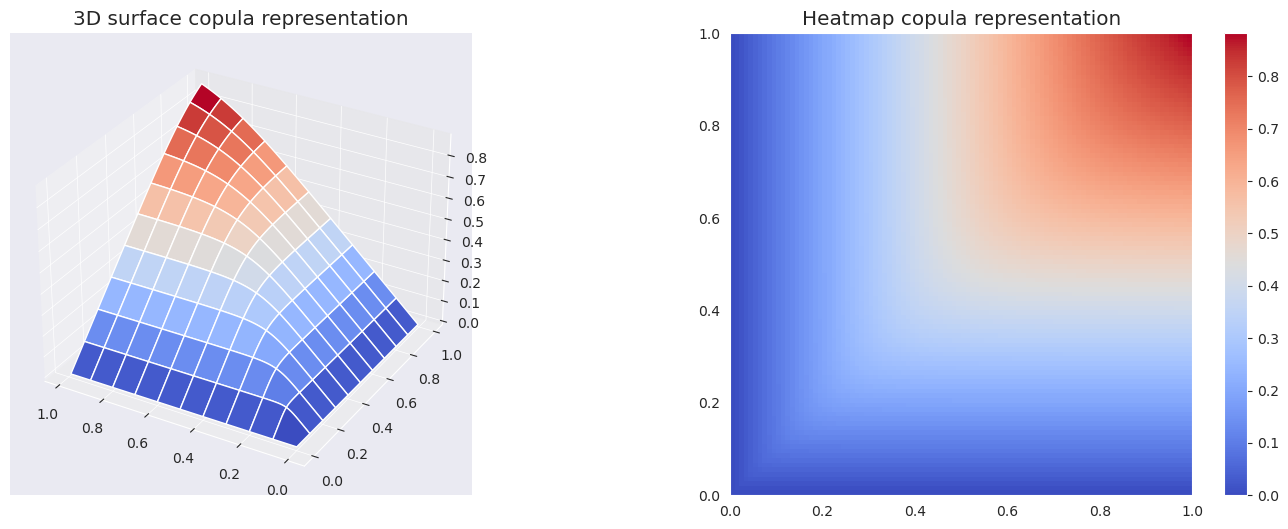

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(18,6))
ax0 = fig.add_subplot(121, projection='3d')
ax1 = fig.add_subplot(122)

x = np.arange(0,1,0.01)
y = np.arange(0,1,0.01)
x,y = np.meshgrid(x,y)

alpha = 6
# apply inverse CDF to each point on a grid
pairs = np.array([[i, j] for (i,j) in zip(x.flatten(),y.flatten())])
# calculate the product of two CDFs for each point on a grid
z = ((pairs[:,0].reshape([100,100]))**(-alpha) + (pairs[:,1].reshape([100,100]))**(-alpha))**(-1/alpha)

ax0.plot_surface(x, y, z, cmap=cm.coolwarm, rstride=10, cstride=10, linewidth=1)
ax0.invert_xaxis()
ax0.set(title='3D surface copula representation')
img = ax1.imshow(np.flip(z,axis=0), cmap=cm.coolwarm, extent=[0,1,0,1])
ax1.grid(False)
ax1.set(title='Heatmap copula representation')
fig.colorbar(img)

In [ ]:
# set parameter
alpha = 6
# generate a sample
u = np.random.rand(10000)
t = np.random.rand(10000)
v = ((t / u**(-alpha-1))**(-alpha/(1+alpha)) - u**(-alpha) + 1)**(-1/alpha)

[Text(0.5, 1.0, 'Scatterplot of U, V'), Text(0.5, 0, 'U'), Text(0, 0.5, 'V')]

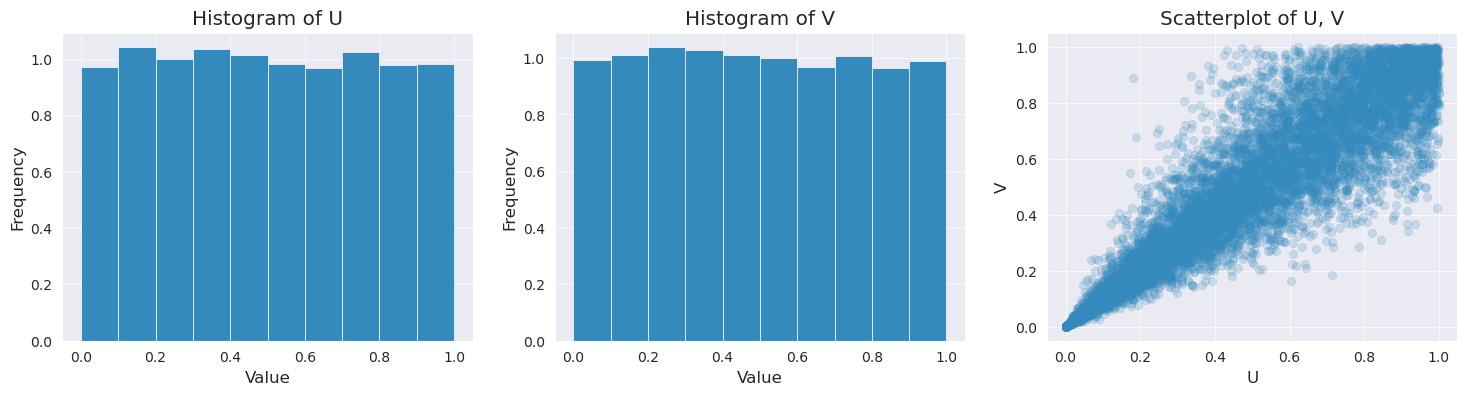

In [ ]:
# plot marginals and joint distribution
fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
ax[0].hist(u, density=True)
ax[0].set(title='Histogram of U', xlabel='Value', ylabel='Frequency')
ax[1].hist(v, density=True)
ax[1].set(title='Histogram of V', xlabel='Value', ylabel='Frequency')
ax[2].scatter(u, v, alpha=0.2)
ax[2].set(title='Scatterplot of U, V', xlabel='U', ylabel='V')

### Sampling method 2

In [ ]:
from sympy import *

# define variables
t,alpha = symbols('t alpha')
# define generator function
expr = 1/alpha * (t**(-alpha) - 1)
# calculate and simplify Kendall distribution
simplify(t - expr/diff(expr, t))

t*(alpha - t**alpha + 1)/alpha

In [ ]:
from scipy.optimize import brentq

In [ ]:
def clayton_phi(t, alpha):
    return 1/alpha * (t**(-alpha) - 1)

def clayton_phi_inv(t, alpha):
    return (alpha * t + 1)**(-1/alpha)

def clayton_K(t, alpha):
    return t * (alpha - t**alpha + 1) / alpha

In [ ]:
# set copula parameter
alpha = 6

# step 1
t1 = np.random.rand(10000)
t2 = np.random.rand(10000)

# steps 2 and 3
w = []
for t in t2:
    func = lambda w: clayton_K(w, alpha=alpha) - t
    w.append(brentq(func, 0.0000000001, 0.9999999999))
w = np.array(w).flatten()

# step 4
u = clayton_phi_inv(t1 * clayton_phi(w, alpha=alpha), alpha=alpha)
v = clayton_phi_inv((1-t1) * clayton_phi(w, alpha=alpha), alpha=alpha)

[Text(0.5, 1.0, 'Scatterplot of U, V'), Text(0.5, 0, 'U'), Text(0, 0.5, 'V')]

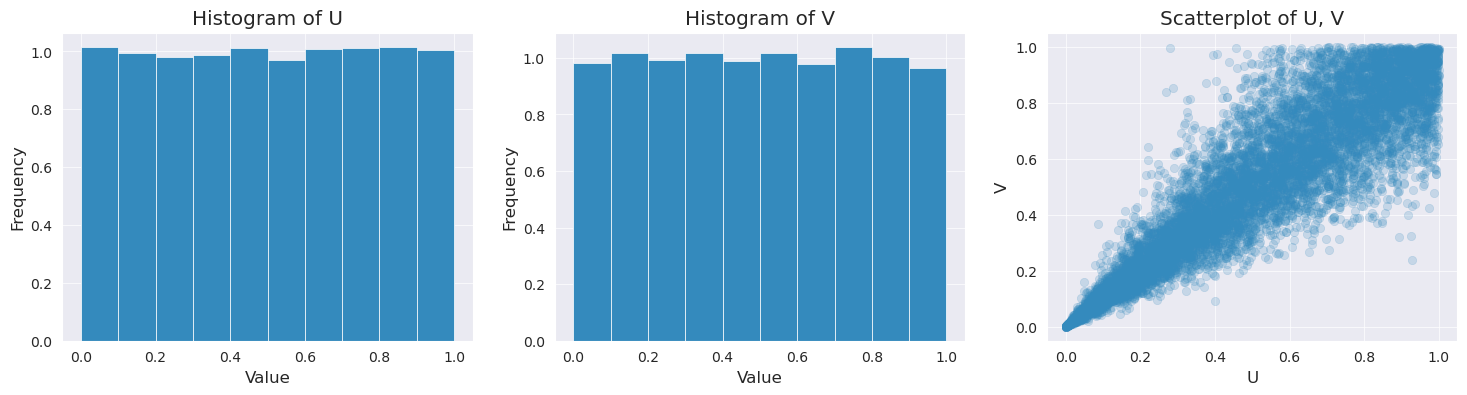

In [ ]:
# plot marginals and joint distribution
fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
ax[0].hist(u, density=True)
ax[0].set(title='Histogram of U', xlabel='Value', ylabel='Frequency')
ax[1].hist(v, density=True)
ax[1].set(title='Histogram of V', xlabel='Value', ylabel='Frequency')
ax[2].scatter(u, v, alpha=0.2)
ax[2].set(title='Scatterplot of U, V', xlabel='U', ylabel='V')

# Not valid. Just for testing

## Calculating derivatives in Python
Just for testing

In [ ]:
from sympy import *

u,v,alpha = symbols('u v alpha')
expr = (u**(-alpha) + v**(-alpha) - 1)**(-1/alpha)

In [ ]:
from sympy import *

u,v,alpha = symbols('u v alpha')
expr = (u**(-alpha) + v**(-alpha) - 1)**(-1/alpha)

In [ ]:
expr

(-1 + v**(-alpha) + u**(-alpha))**(-1/alpha)

In [ ]:
diff(expr, u)

1/(u*u**alpha*(-1 + v**(-alpha) + u**(-alpha))*(-1 + v**(-alpha) + u**(-alpha))**(1/alpha))